# K-means

聚类是一种无监督学习算法，用于把无分类的数据分为K类。  
应用领域：客户群体分类，社交网络等

## 原理

K-means算法的原理是先选取k个初始质心，对每个样本点，计算其到各个质心的距离，选择距离最近的质心，将样本点的类别标为该质心所对应的cluster，再重新计算k个cluster对应的中心点，重复以上步骤，直到中心点不再发生变化。

## 距离计算方法

1. Minkowski（闵氏距离）  
$$d(x,y)=(\sum_{i=1}^n {| x_i-y_i |}^p)^{\frac{1}{p}}$$
> $p=2$ 时为欧氏距离  

2. cosine similarity（余弦相似度，即向量的夹角）
$$s(x,y)=cos(\theta)=\frac{x^Ty}{|x|\cdot |y|}=\frac{\sum_{i=1}^n x_iy_i}{\sqrt{\sum_{i=1}^n x_i^2}\sqrt{\sum_{i=1}^n y_i^2}}$$
> 相似度越高，距离越小；相似度越低，距离越大

3. Pearson coefficient（皮尔逊相关系数）
$$p(x,y)=\frac{cov(x,y)}{\sigma_x\sigma_y}=\frac{\sum_{i=1}^n (x_i-\mu_x)(y_i-\mu_y)}{\sqrt{\sum_{i=1}^n (x_i-\mu_x)^2}\sqrt{\sum_{i=1}^n (y_i-\mu_y)^2}}$$

## 代码实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.io

In [2]:
def loaddata(path):
    data = np.loadtxt(path,delimiter=',')
    return data

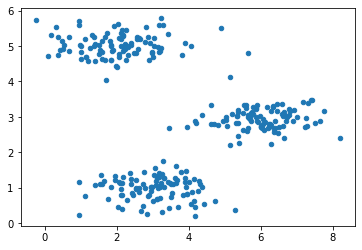

In [3]:
X = loaddata("data/cluster_data.csv")
plt.scatter(X[:,0],X[:,1],s=20)

**1.随机初始化质心**  

实际是从数据点中随机选k个作为质心，如果不从数据点中选，而是随机初始也可以，只是没有前者的收敛性好。

In [4]:
def kMeansInitCentroids(X,k):
    # 数据点中随机选k个作为质心
    index = np.random.randint(0,len(X),k)     # 选择点的索引
    return X[index]

**2.计算数据点到质心的距离，并判断该数据点属于哪个质心**

In [5]:
def findClosestCentroids(X,centroids):
    #idx中数据表明对应X的数据是属于哪一个质心的
    idx = np.zeros(len(X)).reshape( X.shape[0],-1)
    for i in range(len(X)):
        minDistance = float('inf')     #初始无限大
        index = 0
        for k in range(len(centroids)):
            #距离计算，使用欧氏距离
            distance = np.sum(np.power(X[i]-centroids[k],2))
            if(distance<minDistance):
                minDistance = distance
                index = k
        idx[i]=index
    return idx    

**3.重新计算每个类别的质心**  

计算方法：每个维度的坐标分别计算平均值

In [6]:
def computeCentroids(X,idx):
    k = set(np.ravel(idx).tolist())  # 找到所有聚类中心索引
    k = list(k)
    centroids = np.ndarray((len(k),X.shape[1]))    # 存储新的聚类中心的坐标
    for i in range(len(k)):
        #选择数据X中类别为k[i]的数据
        data = X[np.where(idx==k[i])[0]]
        #重新计算聚类中心,按列求平均
        centroids[i] = np.average(data,axis=0)
    return centroids

**4.把所有的方法组合起来形成k-means算法**

In [7]:
def k_means(X,k,max_iters):
    #初始化聚类中心
    initial_centroids = kMeansInitCentroids(X,k)
    #迭代
    for i in range(max_iters):
        if i==0:
            centroids = initial_centroids
        #计算样本到质心的距离，并返回每个样本所属的质心
        idx = findClosestCentroids(X,centroids)
        #重新计算聚类中心
        centroids = computeCentroids(X,idx)
    return idx,centroids

In [8]:
idx,centroids = k_means(X,3,8)
print(idx)
print(centroids)

[[2.]
 [0.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [0.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

**5.画图**

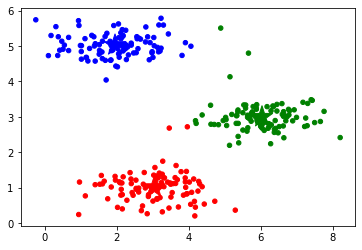

In [9]:
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
plt.scatter(X[:, 0], X[:, 1], c=np.ravel(idx), cmap=cm_dark, s=20)
plt.scatter(centroids[:, 0], centroids[:, 1], c=np.arange(len(centroids)), cmap=cm_dark, marker='*', s=500)
plt.show()

## sklearn实现K-means

In [10]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3,max_iter=10)
model.fit(X)
print('聚类中心:',model.cluster_centers_)
print('每个样本所属的簇:',model.labels_)

聚类中心: [[3.04367119 1.01541041]
 [1.95399466 5.02557006]
 [6.03366736 3.00052511]]
每个样本所属的簇: [1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1]


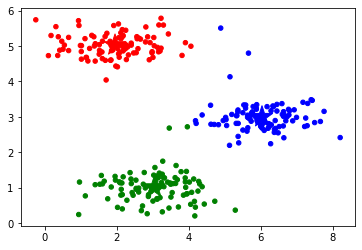

In [11]:
cm_dark = mpl.colors.ListedColormap(['g', 'r','b'])
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=cm_dark, s=20)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c=np.arange(len(model.cluster_centers_)), cmap=cm_dark, marker='*', s=500)

# 层次聚类

## 原理

1. 聚合或自下而上聚类  
2. 分裂或自上而下聚类

**AGNES（Agglomerative Nesting）：凝聚层次聚类**  
1. 构造 $m$ 个类，每个类包含一个样本
2. 计算类与类之间的距离 $d_{ij}$，记做矩阵 $D=[d_{ij}]_{m\times m}$  
3. 合并间距最小的两个类
4. 若达到聚类数 $k$ 则退出  
5. 重新计算类之间的距离 $d_{ij}$，重复步骤3

## 距离计算方法

1. 最小距离
2. 最大距离
3. 中心距离
4. 平均距离  

<img src="img/类间距离.png" width="450px">

## sklearn实现层次聚类

In [12]:
from sklearn.cluster import AgglomerativeClustering

**linkage可取值：**
- ward： 最小方差
- complete 最大距离
- average 平均距离
- single 最小距离

In [13]:
model = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')   # affinity表示距离的计算方法，euclidean为欧氏距离
model.fit(X)
print('每个样本所属的簇:',model.labels_)

每个样本所属的簇: [1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1]


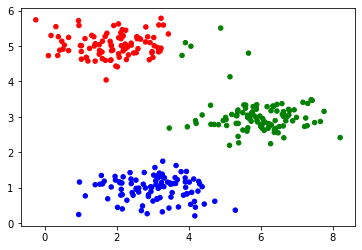

In [14]:
cm_dark = mpl.colors.ListedColormap(['g', 'r','b'])
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=cm_dark, s=20)
plt.show()

# 密度聚类

## 原理

DBSCAN是一种著名的密度聚类方法，给定参数  

1. $\epsilon$ 邻域：$\epsilon$ 为邻域的半径
2. 核心对象：若 $x_i$ 邻域中的点的个数大于等于 $minPts$，则 $x_i$ 为核心对象
3. 密度直达：若 $x_j$ 在 $x_i$ 的邻域中且 $x_i$ 是核心对象，则称 $x_j$ 是可以由 $x_i$ 密度直达的
4. 密度可达：若 $x_j$ 由 $x_i$ 密度直达，$x_k$ 由 $x_j$ 密度直达，则称 $x_k$ 由 $x_i$ 密度可达

以下图为例，若 $minPts=3$，则 $x_1,x_2$ 等都是核心对象，$x_2$ 由 $x_1$ 密度直达，$x_3$ 由 $x_1$ 密度可达
<img src="img/密度聚类.png" width="400px">  

**密度聚类算法过程**  
1. 首先设置 $(\epsilon,Minpts)$ 参数  
2. 确定核心对象，假设为 $\Omega=\{x^{(3)},x^{(5)},x^{(6)},x^{(8)},x^{(9)},x^{(13)},x^{(14)},x^{(18)},x^{(19)},x^{(24)},x^{(25)},x^{(28)},x^{(29)}\}$  
3. 从 $\Omega$ 中随机选取一个核心对象作为种子（假设为 $x^{(8)}$），找出由它密度可达的所有样本，构成一个聚类簇，假设第一个聚类簇为 $C_1=\{x^{(6)},x^{(7)},x^{(8)},x^{(10)},x^{(12)},x^{(18)},x^{(19)},x^{(20)},x^{(23)}\}$  
4. 从 $\Omega$ 中取出 $C_1$ 中包含的核心对象后，$\Omega=\{x^{(3)},x^{(5)},x^{(9)},x^{(13)},x^{(14)},x^{(24)},x^{(25)},x^{(28)},x^{(29)}\}$ 重复步骤3直到 $\Omega$ 为空

## sklearn实现密度聚类

In [15]:
from sklearn.cluster import DBSCAN

In [16]:
model = DBSCAN(eps=0.5,min_samples=5,metric='euclidean')
model.fit(X)
print('每个样本所属的簇:',model.labels_)

每个样本所属的簇: [ 0 -1  1  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1
  0  0  0  0  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2
  2  2  2  2 -1  2 -1  2  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  0]


-1类表示不在任何类中，称为离群点

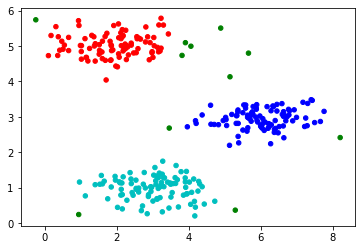

In [17]:
cm_dark = mpl.colors.ListedColormap(['g','r','b','c'])
plt.scatter(X[:, 0], X[:, 1], c=model.labels_, cmap=cm_dark, s=20)
plt.show()

# 高斯混合模型

## 原理

<img src="img/高斯混合模型.png" width="800px">  

在上图中，图2是用一个高斯模型拟合所有数据，通过等高线可以看出，数据不符合高斯分布；图3是分别用两个高斯模型拟合，可以看到这两部分数据都是符合高斯分布的，这两部分数据占全部数据的比例分别为 $\pi_1,\pi_2$，因此我们可以将这两个模型混合，得到高斯混合模型。  

若有 $k$ 个高斯模型，$u_k,{\sum}_k$ 为第 $k$ 个高斯模型的均值向量和协方差矩阵，则高斯混合模型为：

$$p(x)=\sum_{k=1}^K p(k)p(x|k)=\sum_{k=1}^K \pi_kN(x|u_k,{\sum}_k)$$

## 参数估计

第 $i$ 个样本属于第 $k$ 个类别的概率：

$$\gamma(i,k)=\frac{\pi_kf(x_i|\mu_k,{\sum}_k)}{\sum_{j=1}^K \pi_jf(x_i|\mu_i,{\sum}_j)}$$  

$$\begin{cases}
N_k=\sum_{i=1}^N \gamma(i,k) \\
\mu_k=\frac{1}{N_k}\sum_{i=1}^N \gamma(i,k)x_i \\
{\sum}_k=\frac{1}{N_k}\sum_{i=1}^N \gamma(i,k)(x_i-\mu_k)(x_i-\mu_k)^T \\
\pi_k=\frac{N_k}{N}=\frac{1}{N}\sum_{i=1}^N \gamma(i,k)
\end{cases}$$

## 代码实现

In [18]:
# 生成均值为1.71，标准差为0.056的男生身高数据
np.random.seed(0)

mu_m = 1.71
sigma_m = 0.056
num_m = 10000
rand_data_m = np.random.normal(mu_m,sigma_m,num_m)
y_m = np.ones(num_m)

# 生成均值为1.58，标准差为0.051的女生身高数据
np.random.seed(0)

mu_w = 1.58
sigma_w = 0.051
num_w = 10000
rand_data_w = np.random.normal(mu_w,sigma_w,num_w)
y_w = np.ones(num_w)

In [19]:
# 把男生数据和女生数据合在一起
data = np.append(rand_data_m,rand_data_w)
data = data.reshape(-1,1)
y = np.append(y_m,y_w)
print(data)
print(y)

[[1.80878693]
 [1.7324088 ]
 [1.76480933]
 ...
 [1.60636048]
 [1.57832104]
 [1.64620368]]
[1. 1. 1. ... 1. 1. 1.]


In [20]:
from scipy.stats import multivariate_normal

num_iter = 1000
n,d = data.shape
#初始化参数
mu1 = data[np.random.randint(0,n,1)][0,0]
mu2 = data[np.random.randint(0,n,1)][0,0]
sigma1 = np.identity(d)
sigma2 = np.identity(d)
pi = 0.5   # 男生比例为pi，女生比例为1-pi

for i in range(num_iter):
    #计算gamma
    #1.定义两个正态分布
    norm1 = multivariate_normal(mu1,sigma1)
    norm2 = multivariate_normal(mu2,sigma2)
    #2.代入数据计算
    tau1 = pi*norm1.pdf(data)
    tau2 = (1-pi)*norm2.pdf(data)
    gamma1 = tau1/(tau1+tau2)    
    gamma2 = tau2/(tau1+tau2)
    n1 = np.sum(gamma1)
    n2 = np.sum(gamma2)
    
    #计算mu1
    mu1 = np.dot(gamma1,data)/n1
    #计算mu2
    mu2 = np.dot(gamma2,data)/n2
    #计算sigma1
    sigma1 = np.dot(gamma1 * (data - mu1).T, data - mu1) / n1
    #计算sigmal2
    sigma2 = np.dot(gamma2 * (data - mu2).T, data - mu2) / n2
    #计算pi
    pi = n1/n

print(u'类别概率:\t', pi)
print(u'均值:\t', mu1, mu2)
print(u'方差:\n', sigma1, '\n\n', sigma2, '\n')

类别概率:	 0.48738843896965456
均值:	 [1.57749046] [1.70726384]
方差:
 [[0.00244834]] 

 [[0.00315184]] 



## sklearn实现高斯混合模型

In [21]:
np.random.seed(0)

mu_m = 1.71  #期望为
sigma_m = 0.056  #标准差为
num_m = 10000  #个数为10000
rand_data_m = np.random.normal(mu_m, sigma_m, num_m)
y_m = np.ones(num_m)

np.random.seed(0)

mu_w = 1.58  #期望为
sigma_w = 0.051  #标准差为
num_w = 10000  #个数为10000
rand_data_w = np.random.normal(mu_w, sigma_w, num_w)
y_w = np.zeros(num_m)

data = np.append(rand_data_m,rand_data_w)
data = data.reshape(-1,1)
y = np.append(y_m,y_w)

In [22]:
from sklearn.mixture import GaussianMixture

g = GaussianMixture(n_components=2, covariance_type='full', tol=1e-6, max_iter=1000)
g.fit(data)
print(u'类别概率:\t', g.weights_[0])
print(u'均值:\n', g.means_, '\n')
print(u'方差:\n', g.covariances_, '\n')

类别概率:	 0.4996845463290564
均值:
 [[1.57895467]
 [1.70899088]] 

方差:
 [[[0.00251674]]

 [[0.00306335]]] 



In [23]:
from sklearn.metrics import accuracy_score

y_hat = g.predict(data)
print(accuracy_score(y,y_hat))

0.8891


# 案例：对亚洲足球队进行聚类分析

In [24]:
import numpy as np
import pandas as pd 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [25]:
df = pd.read_csv("data/football_team_data.csv",index_col='国家')
df.head()

,2019国际排名,2018世界杯,2015亚洲杯
国家,,,
中国,73,40,7
日本,60,15,5
韩国,61,19,2
伊朗,34,18,6
沙特,67,26,10


In [26]:
X = df.values
X

array([[ 73,  40,   7],
       [ 60,  15,   5],
       [ 61,  19,   2],
       [ 34,  18,   6],
       [ 67,  26,  10],
       [ 91,  40,   4],
       [101,  40,  13],
       [ 81,  40,   6],
       [ 88,  40,   8],
       [122,  40,  17],
       [102,  50,  17],
       [ 87,  50,  12],
       [116,  50,  11],
       [110,  50,  14],
       [164,  50,  17],
       [ 40,  30,   1],
       [ 76,  40,  17],
       [118,  50,   9],
       [160,  50,  15],
       [ 96,  50,  16]], dtype=int64)

In [27]:
# 归一化
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.5842676 ,  0.05223517, -0.64677721],
       [-0.97679881, -2.12423024, -1.03291285],
       [-0.9466041 , -1.77599577, -1.61211632],
       [-1.76186121, -1.86305439, -0.83984503],
       [-0.76543585, -1.16658546, -0.06757374],
       [-0.04076286,  0.05223517, -1.22598067],
       [ 0.26118422,  0.05223517,  0.51162973],
       [-0.34270994,  0.05223517, -0.83984503],
       [-0.13134698,  0.05223517, -0.45370938],
       [ 0.89527309,  0.05223517,  1.28390102],
       [ 0.29137893,  0.92282133,  1.28390102],
       [-0.16154169,  0.92282133,  0.31856191],
       [ 0.71410485,  0.92282133,  0.12549408],
       [ 0.5329366 ,  0.92282133,  0.70469755],
       [ 2.16345083,  0.92282133,  1.28390102],
       [-1.58069297, -0.81835099, -1.80518414],
       [-0.49368348,  0.05223517,  1.28390102],
       [ 0.77449426,  0.92282133, -0.26064156],
       [ 2.042672  ,  0.92282133,  0.89776537],
       [ 0.11021068,  0.92282133,  1.0908332 ]])

In [28]:
model = KMeans(n_clusters=3,max_iter=10)
model.fit(X)
df["聚类结果"] = model.labels_
df

,2019国际排名,2018世界杯,2015亚洲杯,聚类结果
国家,,,,
中国,73,40,7,2
日本,60,15,5,0
韩国,61,19,2,0
伊朗,34,18,6,0
沙特,67,26,10,0
伊拉克,91,40,4,2
卡塔尔,101,40,13,1
阿联酋,81,40,6,2
乌兹别克斯坦,88,40,8,2
